In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

color_dict = {
    "Eggshell": "#f4f1de",
    "Burnt sienna": "#e07a5f",
    "Delft Blue": "#3d405b",
    "Cambridge blue": "#81b29a",
    "Sunset": "#f2cc8f",
}
# Use LaTeX fonts for a professional look
plt.rcParams.update(
    {
        "text.usetex": True,  # Use LaTeX for text rendering
        "font.family": "serif",  # Use serif fonts
    }
)

# Set seaborn style for better aesthetics
# sns.set_style("whitegrid")


df = pd.read_csv("data/accuracy_vs_flops_dutch.csv")

df

,method,accuracy,TFLOPs,method_name
0,random-50,0.389283,1788.0,Random-50
1,random-50_50,0.559496,11175.0,Random-50
2,gmpirt-50,0.375591,1788.0,gmp-IRT-50
3,gmpirt-20_50,0.411855,4470.0,gmp-IRT-20
4,gmpirt-20_24,0.492687,2145.6,gmp-IRT-20
5,gmpirt-30_50,0.408844,6705.0,gmp-IRT-30
6,random-30_24,0.540729,3218.4,Random-30
7,random-50_100,0.423956,22350.0,Random-50
8,gmpirt-50_24,0.559055,5364.0,gmp-IRT-50
9,gmpirt-30,0.372382,1072.8,gmp-IRT-30


In [18]:
# add column with the second number in method, i.e. gmpirt-20_15 -> 15
# if there is no number, it will be 8
df["pi"] = df["method"].apply(
    lambda x: int(x.split("_")[-1]) if x.split("_")[-1].isdigit() else 8
)

# extract the number of samples from the method, i.e. gmpirt-20_15 -> 20
df["samples"] = df["method"].apply(lambda x: int(x.split("-")[1].split("_")[0]))

# calculate pi x samples
df["pi_samples"] = df["pi"] * df["samples"]

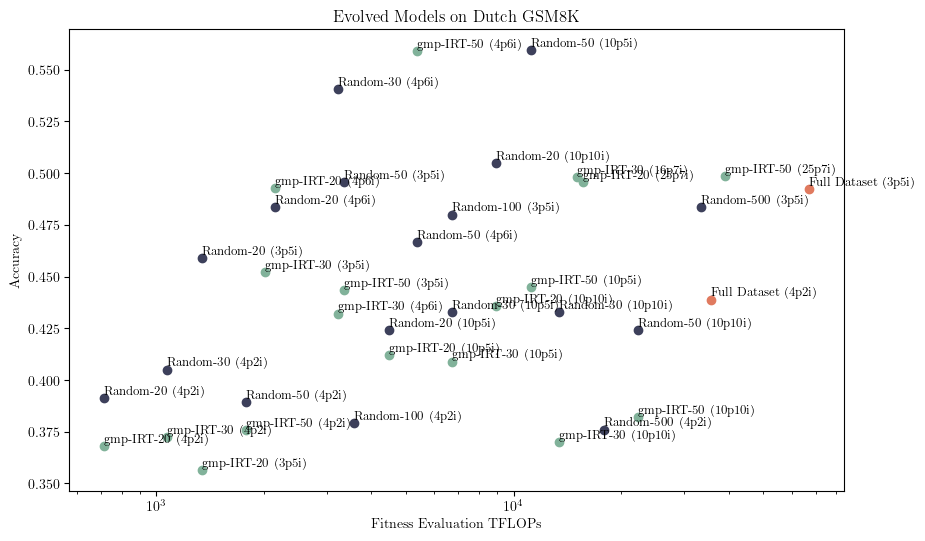

In [4]:
# scatterplot of accuracy vs flops
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# add labels
for i in range(len(df)):
    if "_15" in df.method[i]:
        text = df.method_name[i] + " (3p5i)"
    elif "_24" in df.method[i]:
        text = df.method_name[i] +  " (4p6i)"
    elif "_112" in df.method[i]:
        text = df.method_name[i] + " (16p7i)"
    elif "_50" in df.method[i]:
        text = df.method_name[i] + " (10p5i)"
    elif "_100" in df.method[i]:
        text = df.method_name[i] + " (10p10i)"
    elif "_175" in df.method[i]:
        text = df.method_name[i] + " (25p7i)"
    else:
        text = df.method_name[i] + " (4p2i)"

    text = text.replace("random-1000", "Full Dataset")
    plt.text(df.TFLOPs[i]-1, df.accuracy[i]+0.002, text, fontsize=9)

# color differently gmpirt from random
for i in range(len(df)):
    if "gmp-IRT" in df.method_name[i]:
        plt.scatter(df.TFLOPs[i], df.accuracy[i], color=color_dict["Cambridge blue"])
    elif "Full Dataset" in df.method_name[i]:
        plt.scatter(df.TFLOPs[i], df.accuracy[i], color=color_dict["Burnt sienna"])
    else:
        plt.scatter(df.TFLOPs[i], df.accuracy[i], color=color_dict["Delft Blue"])

#plt.xscale("log")
plt.xlabel("Fitness Evaluation TFLOPs")
plt.ylabel("Accuracy")

# log scale
plt.xscale("log")

plt.title("Evolved Models on Dutch GSM8K")
plt.show()

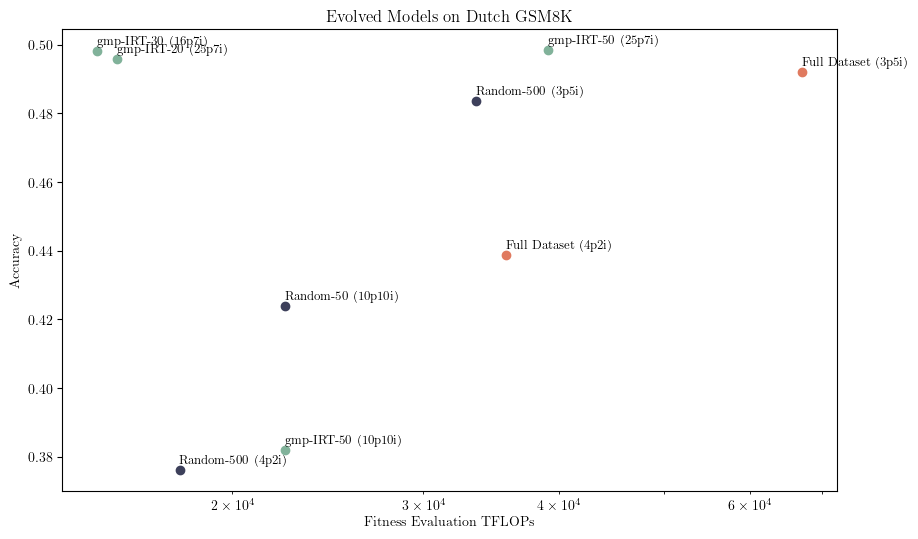

In [9]:
# filter all points with TFLOPs < 10_000 and replot
df_filtered = df[df.TFLOPs > 15_000].reset_index(drop=True)

plt.figure(figsize=(10, 6))

# add labels
for i in range(len(df_filtered)):
    if "_15" in df_filtered.method[i]:
        text = df_filtered.method_name[i] + " (3p5i)"
    elif "_24" in df_filtered.method[i]:
        text = df_filtered.method_name[i] +  " (4p6i)"
    elif "_112" in df_filtered.method[i]:
        text = df_filtered.method_name[i] + " (16p7i)"
    elif "_50" in df_filtered.method[i]:
        text = df_filtered.method_name[i] + " (10p5i)"
    elif "_100" in df_filtered.method[i]:
        text = df_filtered.method_name[i] + " (10p10i)"
    elif "_175" in df_filtered.method[i]:
        text = df_filtered.method_name[i] + " (25p7i)"
    else:
        text = df_filtered.method_name[i] + " (4p2i)"

    text = text.replace("random-1000", "Full Dataset")
    plt.text(df_filtered.TFLOPs[i]-1, df_filtered.accuracy[i]+0.002, text, fontsize=9)

# color differently gmpirt from random
for i in range(len(df_filtered)):
    if "gmp-IRT" in df_filtered.method_name[i]:
        plt.scatter(df_filtered.TFLOPs[i], df_filtered.accuracy[i], color=color_dict["Cambridge blue"])
    elif "Full Dataset" in df_filtered.method_name[i]:
        plt.scatter(df_filtered.TFLOPs[i], df_filtered.accuracy[i], color=color_dict["Burnt sienna"])
    else:
        plt.scatter(df_filtered.TFLOPs[i], df_filtered.accuracy[i], color=color_dict["Delft Blue"])

#plt.xscale("log")
plt.xlabel("Fitness Evaluation TFLOPs")
plt.ylabel("Accuracy")

# log scale
plt.xscale("log")

plt.title("Evolved Models on Dutch GSM8K")
plt.show()

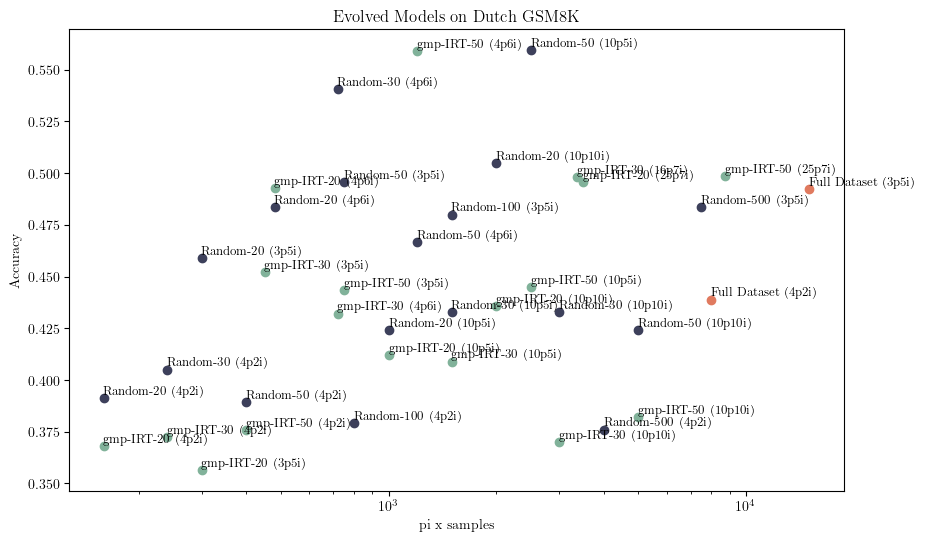

In [20]:
# scatterplot of accuracy vs flops
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# add labels
for i in range(len(df)):
    if "_15" in df.method[i]:
        text = df.method_name[i] + " (3p5i)"
    elif "_24" in df.method[i]:
        text = df.method_name[i] +  " (4p6i)"
    elif "_112" in df.method[i]:
        text = df.method_name[i] + " (16p7i)"
    elif "_50" in df.method[i]:
        text = df.method_name[i] + " (10p5i)"
    elif "_100" in df.method[i]:
        text = df.method_name[i] + " (10p10i)"
    elif "_175" in df.method[i]:
        text = df.method_name[i] + " (25p7i)"
    else:
        text = df.method_name[i] + " (4p2i)"

    text = text.replace("random-1000", "Full Dataset")
    plt.text(df.pi_samples[i]-1, df.accuracy[i]+0.002, text, fontsize=9)

# color differently gmpirt from random
for i in range(len(df)):
    if "gmp-IRT" in df.method_name[i]:
        plt.scatter(df.pi_samples[i], df.accuracy[i], color=color_dict["Cambridge blue"])
    elif "Full Dataset" in df.method_name[i]:
        plt.scatter(df.pi_samples[i], df.accuracy[i], color=color_dict["Burnt sienna"])
    else:
        plt.scatter(df.pi_samples[i], df.accuracy[i], color=color_dict["Delft Blue"])

#plt.xscale("log")
plt.xlabel("pi x samples")
plt.ylabel("Accuracy")

# log scale
plt.xscale("log")

plt.title("Evolved Models on Dutch GSM8K")
plt.show()